In [ ]:
!pip install scikit-image opencv-python


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_sauvola
import os


In [ ]:
import kagglehub
path = kagglehub.dataset_download("atikaakter11/brain-tumor-segmentation-dataset")



Using Colab cache for faster access to the 'brain-tumor-segmentation-dataset' dataset.


In [ ]:
def metrics(pred, gt):
    pred = pred > 0
    gt = gt > 0

    intersection = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()

    if union == 0:
        return 0, 0

    dice = 2 * intersection / (pred.sum() + gt.sum() + 1e-8)
    jaccard = intersection / (union + 1e-8)

    return dice, jaccard


In [ ]:
base_path = "/kaggle/input/brain-tumor-segmentation-dataset/Brain Tumor Segmentation Dataset"


In [ ]:
dice_o_total = 0
dice_s_total = 0
jac_o_total = 0
jac_s_total = 0
count = 0


In [ ]:
import matplotlib.pyplot as plt

def show_dice(o, s):
    plt.bar(['Otsu','Sauvola'], [o, s])
    plt.title('Dice Comparison')
    plt.ylim(0,1)
    plt.show()



In [ ]:
import matplotlib.pyplot as plt

def show_jaccard(o, s):
    plt.bar(['Otsu','Sauvola'], [o, s])
    plt.title('Jaccard Comparison')
    plt.ylim(0,1)
    plt.show()



In [ ]:
for cls in ["0","1","2","3"]:
    img_dir = os.path.join(base_path, "image", cls)
    mask_dir = os.path.join(base_path, "mask", cls)

    img_list = sorted(os.listdir(img_dir))
    mask_list = sorted(os.listdir(mask_dir))

    for i in range(min(len(img_list), len(mask_list))):
        img = cv2.resize(cv2.imread(os.path.join(img_dir, img_list[i]), 0), (256,256))
        mask = cv2.resize(cv2.imread(os.path.join(mask_dir, mask_list[i]), 0), (256,256))

        _, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        sauvola = (img > threshold_sauvola(img, 25)).astype(np.uint8) * 255

        dice_o, jac_o = metrics(otsu, mask)
        dice_s, jac_s = metrics(sauvola, mask)

        dice_o_total += dice_o; jac_o_total += jac_o
        dice_s_total += dice_s; jac_s_total += jac_s
        count += 1


Images Used: 4237
Otsu Dice Avg: 0.05257476178990806
Otsu Jaccard Avg: 0.028433868404990965
Sauvola Dice Avg: 0.03467235674713922
Sauvola Jaccard Avg: 0.01817359866311565


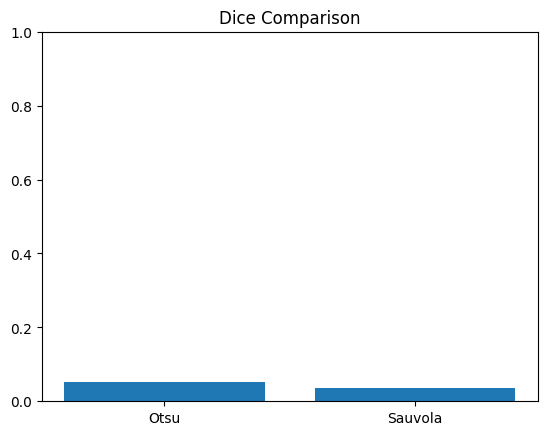

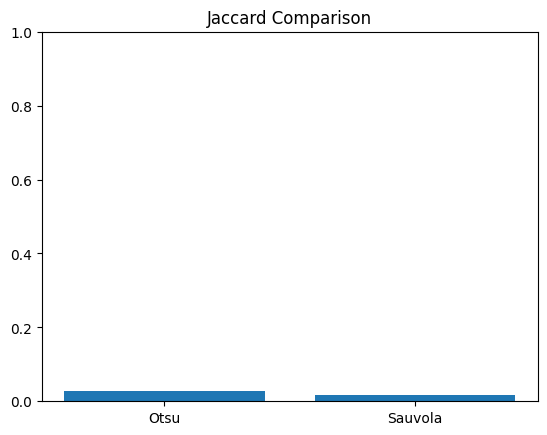

In [ ]:
print("Images Used:", count)
print("Otsu Dice Avg:", dice_o_total/count)
print("Otsu Jaccard Avg:", jac_o_total/count)
print("Sauvola Dice Avg:", dice_s_total/count)
print("Sauvola Jaccard Avg:", jac_s_total/count)

show_dice(dice_o_total/count, dice_s_total/count)
show_jaccard(jac_o_total/count, jac_s_total/count)


In [ ]:
import matplotlib.pyplot as plt

def show_sample(c):
    idr = os.path.join(base_path, "image", c)
    mdr = os.path.join(base_path, "mask", c)

    img = cv2.resize(cv2.imread(os.path.join(idr, sorted(os.listdir(idr))[0]), 0), (256,256))
    mask = cv2.resize(cv2.imread(os.path.join(mdr, sorted(os.listdir(mdr))[0]), 0), (256,256))

    _, otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    sau = (img > threshold_sauvola(img, 25)).astype('uint8') * 255

    plt.figure(figsize=(10,4))
    plt.suptitle(f"Class {c}")

    for i, (im, t) in enumerate(zip([img, mask, otsu, sau],
                                     ["Original","Mask","Otsu","Sauvola"])):
        plt.subplot(1,4,i+1)
        plt.imshow(im, cmap='gray')
        plt.title(t)
        plt.axis('off')

    plt.show()


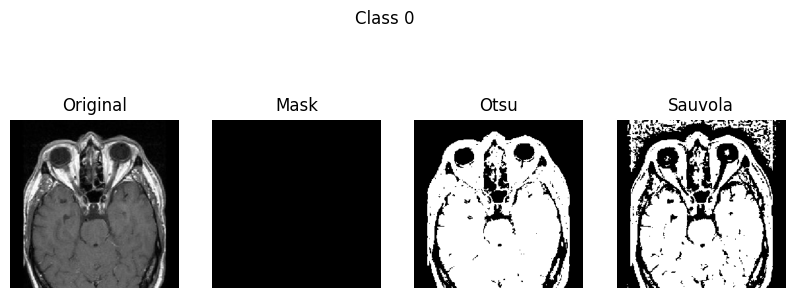

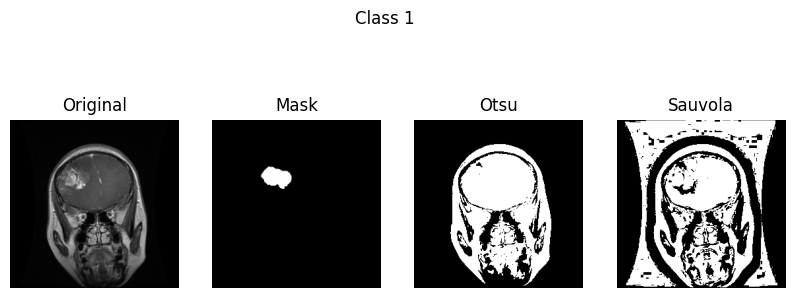

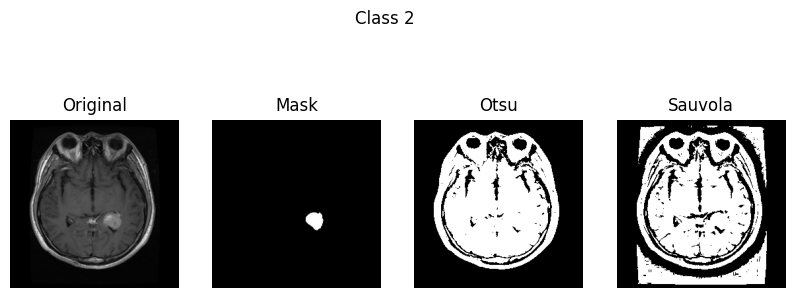

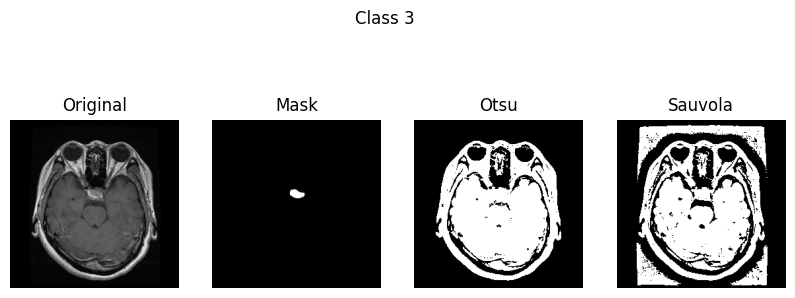

In [ ]:
for cls in ["0","1","2","3"]:
    show_sample(cls)

RESULT:-
Both Otsu and Sauvola produced low overlap scores, showing that basic thresholding is not sufficient for accurate brain tumor segmentation. Otsu performed slightly better, but advanced methods are required for reliable results.